21.03.25 ML_DL 컨벌루션 신경망 레이어(CNN)

# 컨벌루션 신경망 레이어(CNN)

(24, 24, 4)
<class 'numpy.ndarray'>


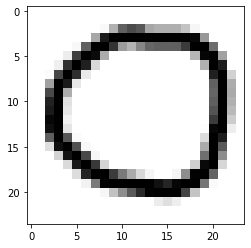

In [31]:
import matplotlib.pyplot as plt
c0 = plt.imread('data/handwriting/handwriting_shape/train/circle/circle001.png')
plt.imshow(c0)
print(c0.shape)
print(type(c0))

In [32]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D # 필터링
from tensorflow.keras.layers import MaxPool2D # 풀링
from tensorflow.keras.layers import Flatten # 2차원 영상 데이터를 1차원
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
np.random.seed(3)

In [33]:
# 1. 데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255) # 정규화작업
train_generator = train_datagen.flow_from_directory(
                    'data/handwriting/hard_handwriting_shape/train',
                    target_size = (24,24),
                    batch_size=3,
                    class_mode = "categorical")

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                    'data/handwriting/hard_handwriting_shape/test',
                    target_size= (24,24),
                    batch_size=3,
                    class_mode = "categorical")

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [37]:
# 2. 모델 구성
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(24,24,3)))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) # 2*2에서 제일 큰값만 뽑아 이미지 축소
model.add(Flatten()) # 2차원 이미지데이터를 1차원으로
model.add(Dense(128, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [40]:
# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", 
              metrics=['accuracy'])
# 4. 모델 학습시키기
model.fit_generator(train_generator, steps_per_epoch=15,
                   epochs=50,
                   validation_data=test_generator,
                   validation_steps=5)

Epoch 1/50
15/15 [==============================] - 1s 25ms/step - loss: 0.9181 - accuracy: 0.5262 - val_loss: 2.5092 - val_accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 0s 14ms/step - loss: 0.2593 - accuracy: 0.8850 - val_loss: 2.6871 - val_accuracy: 0.4000
Epoch 3/50
15/15 [==============================] - 0s 14ms/step - loss: 0.0471 - accuracy: 1.0000 - val_loss: 3.6513 - val_accuracy: 0.3333
Epoch 4/50
15/15 [==============================] - 0s 14ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 4.4173 - val_accuracy: 0.3333
Epoch 5/50
15/15 [==============================] - 0s 15ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 4.4304 - val_accuracy: 0.3333
Epoch 6/50
15/15 [==============================] - 0s 15ms/step - loss: 4.7112e-04 - accuracy: 1.0000 - val_loss: 4.5048 - val_accuracy: 0.3333
Epoch 7/50
15/15 [==============================] - 0s 14ms/step - loss: 3.6067e-04 - accuracy: 1.0000 - val_loss: 4.5887 - val_accuracy: 0.3333
Epoch

In [41]:
# 5. 모델 평가하기
score = model.evaluate_generator(test_generator, steps=5)
print('loss :',score[0])
print('accuracy :',score[1])
print()
# 6. 예측 하기
pred = model.predict_generator(test_generator)
print(test_generator.class_indices)
np.set_printoptions(formatter={'float':lambda x : "{:0.2f}".format(x)})
print(pred)

loss : 5.552955150604248
accuracy : 0.3333333432674408

{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.00 0.00 1.00]
 [0.00 0.01 0.99]
 [0.01 0.01 0.98]
 [0.00 0.01 0.99]
 [0.00 0.00 1.00]
 [0.28 0.00 0.72]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [0.06 0.00 0.94]
 [0.27 0.00 0.73]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [0.93 0.00 0.06]]


C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


## accuracy 늘리기
- 데이터 확보, 데이터 부풀리기(ImageDataGenerator)
- 레이어 층
- 레이어 층

In [42]:
# 1. 데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255, # 정규화작업
                            rotation_range=10,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.7, #0.7라이안 밀림
                            zoom_range=[0.9,2.2], # 0.9배~2.2배
                            horizontal_flip=True, # 수평방향으로 뒤집기
                            vertical_flip=True, # 수직방향으로 뒤집기
                            fill_mode='nearest')#이미지를 회전, 
                              #이동하거나 축소할 때 공간을 채우는 방식

train_generator = train_datagen.flow_from_directory(
                    'data/handwriting/hand_test/train',
                    target_size = (24,24),
                    batch_size=3,
                    class_mode = "categorical")

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                    'data/handwriting/hand_test/test',
                    target_size= (24,24),
                    batch_size=3,
                    class_mode = "categorical")

Found 69 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [43]:
# 2. 모델 구성
# Conv2D(필터갯수, 필터사이즈, activation_fun, 입력사이즈)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(24,24,3)))
model.add(Conv2D(32, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) # 2*2에서 제일 큰값만 뽑아 이미지 축소
model.add(Dropout(0.1)) # 과적합을 막는 목적
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) # 2*2에서 제일 큰값만 뽑아 이미지 축소
model.add(Dropout(0.1))
model.add(Flatten()) # 2차원 이미지데이터를 1차원으로
model.add(Dense(128, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [44]:
# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", 
              metrics=['accuracy'])
# 4. 모델 학습시키기
model.fit_generator(train_generator, steps_per_epoch=15,
                   epochs=50,
                   validation_data=test_generator,
                   validation_steps=5)

Epoch 1/50
15/15 [==============================] - 1s 23ms/step - loss: 1.1278 - accuracy: 0.3110 - val_loss: 1.0975 - val_accuracy: 0.4000
Epoch 2/50
15/15 [==============================] - 0s 10ms/step - loss: 1.0816 - accuracy: 0.5005 - val_loss: 1.0941 - val_accuracy: 0.5333
Epoch 3/50
15/15 [==============================] - 0s 11ms/step - loss: 1.0971 - accuracy: 0.2971 - val_loss: 1.0948 - val_accuracy: 0.3333
Epoch 4/50
15/15 [==============================] - 0s 10ms/step - loss: 1.0975 - accuracy: 0.3008 - val_loss: 1.0922 - val_accuracy: 0.4000
Epoch 5/50
15/15 [==============================] - 0s 10ms/step - loss: 1.0887 - accuracy: 0.3444 - val_loss: 1.0809 - val_accuracy: 0.3333
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 1.0739 - accuracy: 0.4028 - val_loss: 1.0478 - val_accuracy: 0.4667
Epoch 7/50
15/15 [==============================] - 0s 10ms/step - loss: 1.0490 - accuracy: 0.3670 - val_loss: 0.9434 - val_accuracy: 0.7333
Epoch 8/50
15

In [45]:
# 5. 모델 평가하기
score = model.evaluate_generator(test_generator, steps=5)
print('loss :',score[0])
print('accuracy :',score[1])
print()
# 6. 예측 하기
pred = model.predict_generator(test_generator)
print(test_generator.class_indices)
np.set_printoptions(formatter={'float':lambda x : "{:0.2f}".format(x)})
print(np.argmax(pred, axis=1))
print(pred)

loss : 1.471691370010376
accuracy : 0.7333333492279053

{'circle': 0, 'rectangle': 1, 'triangle': 2}
[2 1 2 0 0 0 0 2 2 1 2 0 0 1 2]
[[0.00 0.00 1.00]
 [0.00 1.00 0.00]
 [0.24 0.05 0.71]
 [0.92 0.02 0.06]
 [0.98 0.00 0.02]
 [0.56 0.04 0.41]
 [0.78 0.00 0.22]
 [0.00 0.00 1.00]
 [0.01 0.00 0.99]
 [0.43 0.51 0.06]
 [0.03 0.00 0.97]
 [0.99 0.00 0.01]
 [1.00 0.00 0.00]
 [0.16 0.83 0.00]
 [0.06 0.00 0.94]]
